<a href="https://colab.research.google.com/github/wonyoung-ji/asiae_edu/blob/master/fintech/200915_%ED%98%84%EB%8C%80%EB%B0%B1%ED%99%94%EC%A0%90_%EC%A3%BC%EC%8B%9D_%ED%81%AC%EB%A1%A4%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 패키지 설치

In [ ]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import requests
from bs4 import BeautifulSoup as bs

## 웹크롤링


In [ ]:
url='https://finance.naver.com/item/sise_day.nhn?code=069960&page='
table=[]
for i in range(1,124):
  new_url=url+str(i)
  table.append(pd.read_html(new_url))

In [ ]:
table_df = table[0][0]
for i in range(len((table))):
  table_df=pd.concat([table_df,table[i][0]],axis=0)

In [ ]:
table_df.dropna(inplace=True)
table_df.reset_index(inplace=True, drop=True)
table_df

,날짜,종가,전일비,시가,고가,저가,거래량
0,2020.09.15,57400.0,200.0,57500.0,58000.0,56600.0,149568.0
1,2020.09.14,57200.0,900.0,57000.0,58400.0,56700.0,324102.0
2,2020.09.11,56300.0,100.0,56400.0,57400.0,56200.0,269437.0
3,2020.09.10,56400.0,400.0,56500.0,57200.0,55900.0,262036.0
4,2020.09.09,56000.0,400.0,55900.0,56600.0,55400.0,125147.0
...,...,...,...,...,...,...,...
1235,2015.09.18,141000.0,1000.0,140500.0,142000.0,139000.0,57708.0
1236,2015.09.17,140000.0,2000.0,143500.0,144000.0,140000.0,62530.0
1237,2015.09.16,142000.0,3000.0,144500.0,145500.0,141500.0,109173.0
1238,2015.09.15,145000.0,1500.0,142500.0,145500.0,142500.0,69604.0


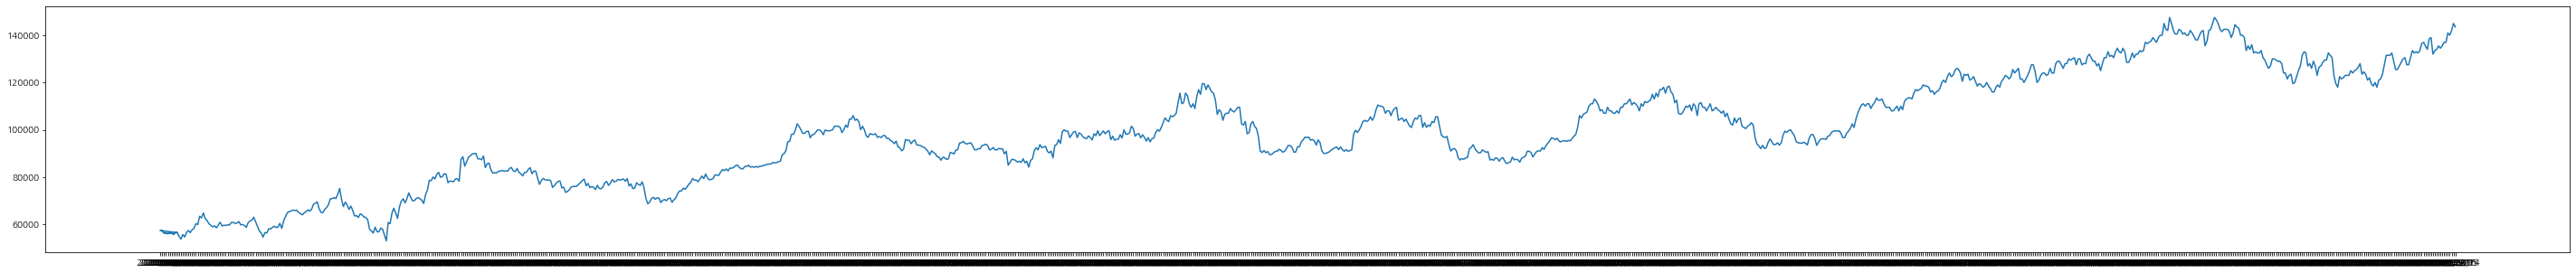

In [ ]:
x=table_df['날짜']
y=table_df['종가']

plt.figure(figsize=[50,5])
plt.plot(list(x),list(y))

## 종가 최고치 찾기

In [ ]:
table_df[table_df['종가']==table_df['종가'].max()]

,날짜,종가,전일비,시가,고가,저가,거래량
1086,2016.04.29,147500.0,2500.0,145500.0,147500.0,144000.0,82805.0
1110,2016.03.25,147500.0,1000.0,146500.0,147500.0,144500.0,82629.0


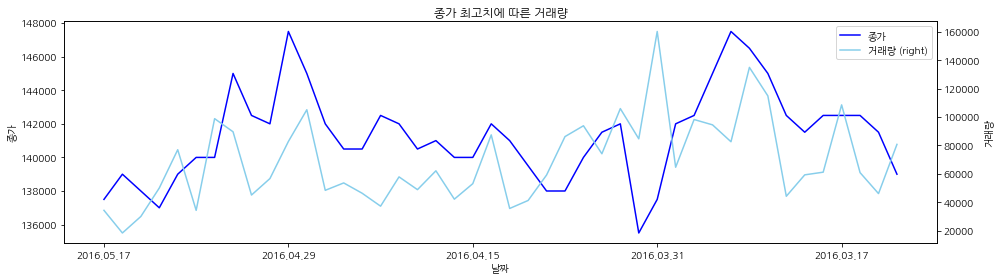

In [ ]:
max_x=table_df[1076:1120]['날짜']
max_y=table_df[1076:1120]['종가']
max_z=table_df[1076:1120]['거래량']


plt.rcParams["figure.figsize"] = (14,4)
ax=table_df[1076:1120].plot(kind='line', x='날짜', y='종가', color='Blue')
ax2=table_df[1076:1120].plot(kind='line', x='날짜', y='거래량', secondary_y=True, color='skyblue', ax=ax)
ax.set_ylabel('종가')
ax2.set_ylabel('거래량')
plt.title('종가 최고치에 따른 거래량')
plt.tight_layout()
plt.show()

## 종가 최저치 찾기

In [ ]:
table_df[table_df['종가']==table_df['종가'].min()]

,날짜,종가,전일비,시가,고가,저가,거래량
131,2020.03.23,53000.0,7800.0,57500.0,58900.0,52600.0,120557.0


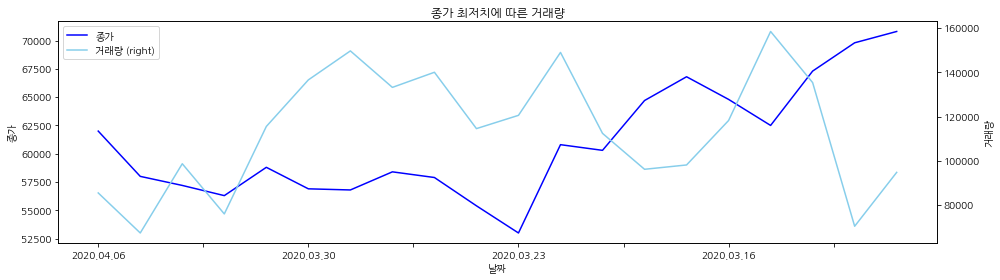

In [ ]:
min_x=table_df[121:141]['날짜']
min_y=table_df[121:141]['종가']
min_z=table_df[121:141]['거래량']


plt.rcParams["figure.figsize"] = (14,4)
ax=table_df[121:141].plot(kind='line', x='날짜', y='종가', color='Blue')
ax2=table_df[121:141].plot(kind='line', x='날짜', y='거래량', secondary_y=True, color='skyblue', ax=ax)
ax.set_ylabel('종가')
ax2.set_ylabel('거래량')
plt.title('종가 최저치에 따른 거래량')
plt.tight_layout()
plt.show()

- 주가가 급등, 급락에 영향을 주는 것은 무엇일까?
- 개인, 외국인, 기관의 매수 및 매도 거래량과 주가 변동 사항을 비교해 상관관계 분석해 보아야 한다.
- 이를 통해 관련성을 찾는다면, 외인 매수세가 강세일때 주가가 오른다는 것을 대체로 발견할 것으로 예상된다.